# Traveling Salesman Problem

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

from copy import deepcopy
import tqdm

from tsp_utils import *

plt.rc('animation', html='html5')

## Read cities

In [2]:
filepath = '../data/ir.csv'
iran_df = pd.read_csv(filepath)
iran_df.head(n=20)

,city,lat,lng,country,iso2,admin,capital,population,population_proper
0,Tehran,35.705000,51.421600,Iran,IR,Tehrān,primary,7873000.0,7153309.0
1,Mashhad,36.315591,59.567964,Iran,IR,Khorāsān-e Raẕavī,admin,2469000.0,2167253.0
2,Eşfahān,32.657218,51.677608,Iran,IR,Eşfahān,admin,1628000.0,1517766.0
3,Karaj,35.832664,50.991545,Iran,IR,Alborz,admin,1423000.0,1423000.0
4,Tabrīz,38.080000,46.291900,Iran,IR,Āz̄arbāyjān-e Sharqī,admin,1413000.0,1196426.0
5,Shīrāz,29.610308,52.531135,Iran,IR,Fārs,admin,1240000.0,1240000.0
6,Ahvāz,31.312381,48.677175,Iran,IR,Khūzestān,admin,996000.0,841145.0
7,Qom,34.640100,50.876400,Iran,IR,Qom,admin,973000.0,893956.0
8,Kermānshāh,34.314167,47.065000,Iran,IR,Kermānshāh,admin,828313.0,828313.0
9,Zāhedān,29.496300,60.862900,Iran,IR,Sīstān va Balūchestān,admin,598887.0,551980.0


In [3]:
ir = parse_latlng(filepath)

xcoords = [c.x for c in ir]
ycoords = [c.y for c in ir]

minx, maxx = min(xcoords), max(xcoords)
miny, maxy = min(ycoords), max(ycoords)

### Visualize data

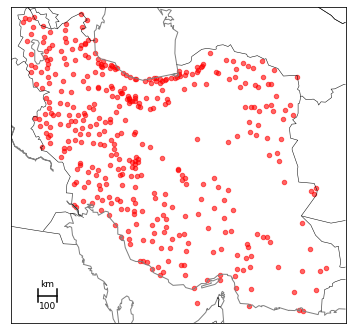

In [4]:
lat = iran_df['lat'].values
lon = iran_df['lng'].values
pop = iran_df['population'].values


fig = plt.figure(figsize=(6, 6))
m = Basemap(projection='lcc', resolution='l', 
            lat_0=32.5, lon_0=54,
            width=1.8E6, height=1.7E6)

m.drawmapscale(47, 26, lon0=54, lat0=32.5, length=100)
# m.shadedrelief(scale=0.5)
m.drawcoastlines(color='gray')
m.drawcountries(color='black')

# 2. scatter city data
m.scatter(lon, lat, latlon=True, c='red', s=20, alpha=0.6)

plt.show()

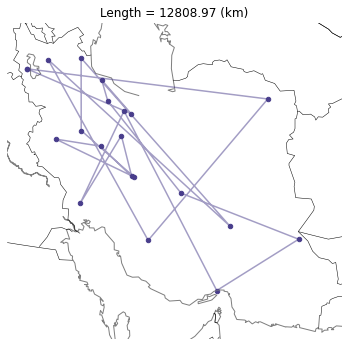

In [5]:
# create and display a random tour
N = 20
tour = Tour(ir[:N])
tour.plot()

### Representation
- A tour containing $N$ cities can be represented by a **permutation** of numbers in range $0$ and $N - 1$.

In [6]:
print(tour.ids)

[12, 0, 10, 16, 15, 9, 17, 3, 6, 7, 18, 14, 8, 2, 13, 19, 11, 4, 5, 1]


## Simulated Anealling

In [7]:
def sa(cities, T0=10, alpha=0.999, tol=1e-20):
    # create a random tour of input cities
    current = Tour(cities)
    
    T = T0
    history = [current]
    max_iters = int(math.log(tol/T0) / math.log(alpha))    
    
    # progress bar
    pbar = tqdm.tqdm(range(max_iters), total=max_iters, desc='T = {:.5f}'.format(T),
                        postfix={'current': "{:.2f}".format(current.length())})
    
    # SA loop
    for i in pbar:
        if T < tol:
            return current, history
        
        # select a random neighbor of current
        neighbor = current.random_neighbor()
        
        # decide to go from current to neighbor
        delta_E = current.length() - neighbor.length()
        if delta_E > 0:
            current = neighbor
        elif random.random() < math.exp(delta_E / T):
            current = neighbor
        
        # decrease temperature slowly
        T = alpha * T
        
        # update progress bar
        pbar.set_description("T = {:.15f}".format(T))
        pbar.set_postfix({'current': "{:.2f}".format(current.len)})
        history.append(current)
        
    return current, history

T = 0.000000000100132: 100%|██████████| 8199/8199 [00:19<00:00, 424.81it/s, current=7809.28] 


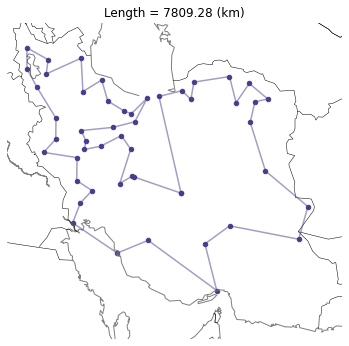

In [8]:
# do simulated annealling
N = 50 # len(ir)
solution, history = sa(ir[:N], T0=5, alpha=0.997, tol=1e-10)
solution.plot()

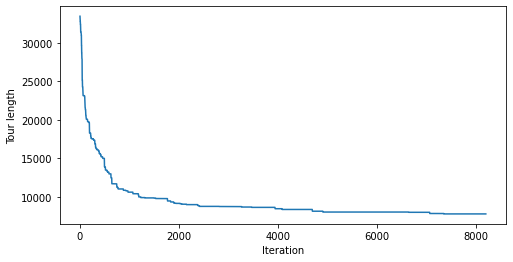

In [9]:
plot_sa_history(history)

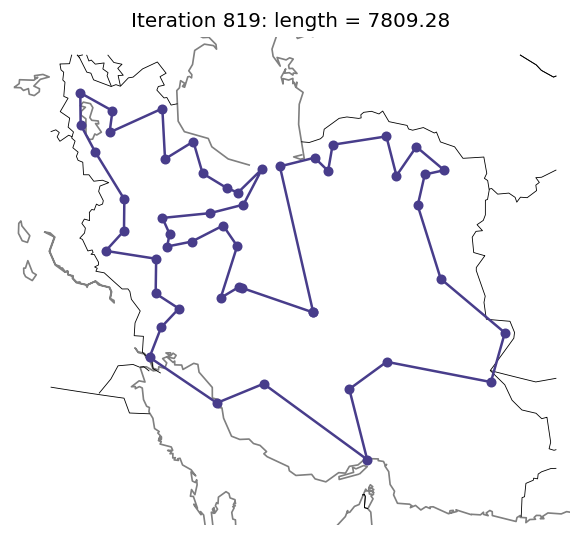

In [10]:
create_animation_plot(history, xlim=(minx, maxx), ylim=(miny, maxy), step=10, dpi=120)

## Genetic Algorithm

In [11]:
def tournament_selection(population, k=2):
    samples = [random.choice(population) for _ in range(k)]
    return min(samples, key=lambda tour: tour.length())


def mutate(chromosome):
    N = chromosome.N
    offspring = deepcopy(chromosome)
    
    i = random.randint(0, N - 2)
    j = random.randint(i + 1, N - 1)
    
    mut_type = random.choice([1, 2, 2, 2])
    if mut_type == 1:  # swap mutation
        offspring.ids[i], offspring.ids[j] = offspring.ids[j], offspring.ids[i]
    elif mut_type == 2:  # inverse mutation
        offspring.ids[i:j+1] = reversed(offspring.ids[i:j+1])
    else:  # scramble mutation
        random.shuffle(offspring.ids[i:j+1])
        
    offspring.len = -1  # offspring.length()
    return offspring

def flat(lst):
    return [x for L in lst for x in L]


def order1_crossover(parent1, parent2):
    """Order 1 crossover."""
    
    def next(idx, N):
        return (idx + 1) % N
    
    N = parent1.N
    child1 = deepcopy(parent1)
    child2 = deepcopy(parent2)
    
    i = random.randint(0,   N - 2)
    j = random.randint(i+1, N - 1)
        
    # create child1
    k1 = k2 = j
    count = j - i
    while count < N:
        if parent2.ids[k1] not in child1.ids[i:j]:
            child1.ids[k2] = parent2.ids[k1]
            k1 = next(k1, N)
            k2 = next(k2, N)
            count += 1
        else:
            k1 = next(k1, N)
                
    # create child2
    k1 = k2 = j
    count = j - i
    while count < N:
        if parent1.ids[k1] not in child2.ids[i:j]:
            child2.ids[k2] = parent1.ids[k1]
            k1 = next(k1, N)
            k2 = next(k2, N)
            count += 1
        else:
            k1 = next(k1, N)

    child1.len = child2.len = -1
    return child1, child2


def cycle_crossover(parent1, parent2):
    # find cycles
    N = parent1.N
    p1, p2 = parent1.ids, parent2.ids
    
    i = 0
    count = 0
    start_idx = 0
    cycles = []
    
    while count < N:
        cycle = []
        idx = start_idx
        while True:
            cycle.append(idx)
            idx = p1.index(p2[idx])
            if idx == start_idx: 
                break
        
        count += len(cycle)
        cycles.append(cycle)
        
        for j in range(start_idx + 1, N):
            if j not in flat(cycles):
                start_idx = j
                break
                
    # distribute cycles
    child1, child2 = deepcopy(parent1), deepcopy(parent2)
    
    for i in range(1, len(cycles), 2):
        for idx in cycles[i]:
            child1.ids[idx], child2.ids[idx] = parent2.ids[idx], parent1.ids[idx]
            
    child1.len = child2.len = -1
    return child1, child2


def crossover(parent1, parent2, crossover_operators=[order1_crossover]):
    crossover_operator = random.choice(crossover_operators)
    return crossover_operator(parent1, parent2)

In [14]:
def ga(cities, pop_size=100, max_generations=50, pc=0.9, pm=0.2, k=10):
    
    def ls(tour, depth=50):
        current = tour
        for i in range(depth):
            neighbor = current.random_neighbor()
            if neighbor.length() < current.length():
                current = neighbor
        return current
    
    f = lambda tour: ls(tour) if random.random() < 0.1 else tour
    
    best_tours, bests, means = [], [], []
    
    # create random initial population
    population = [Tour(cities) for _ in range(pop_size)]
       
    pbar = tqdm.tqdm(range(0, max_generations + 1), 
                         desc='Generation 0', 
                         total=max_generations, 
                         postfix={'best': -1, 'mean': -1})
    
    for generation in pbar:
        
        # gather statistics
        population = [f(tour) for tour in population]
        best_tour = min(population, key=lambda tour: tour.length())
        mean = sum([tour.length() for tour in population]) / pop_size
        best_tours.append(best_tour)
        bests.append(best_tour.length())
        means.append(mean)
        
        pbar.set_description('Generation {:3d}'.format(generation))
        pbar.set_postfix({'best': "{:.2f}".format(best_tour.length()), 'mean': "{:.2f}".format(mean)})
        
        new_population = []
        
        for _ in range(pop_size // 2):
            
            # select parents
            parent1 = tournament_selection(population, k)
            parent2 = tournament_selection(population, k)
            
            # crossover
            if random.random() < pc:
                child1, child2 = crossover(parent1, parent2)
            else:
                child1, child2 = deepcopy(parent1), deepcopy(parent2)
                
            # mutation
            if random.random() < pm:
                child1 = mutate(child1)
            if random.random() < pm:
                child2 = mutate(child2)
                                
            # add offsprings to the new population
            new_population += [child1, child2]
                
        population = new_population
        
    return best_tour, best_tours, bests, means

#### Run GA

Generation 100: : 101it [00:46,  2.15it/s, best=7574.84, mean=8389.76]                        


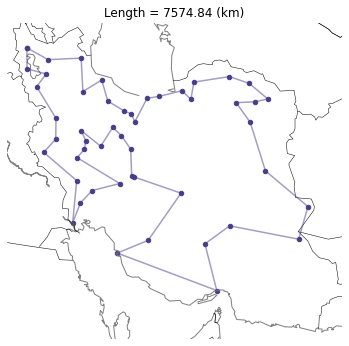

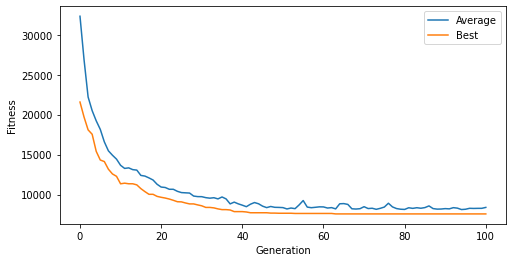

In [15]:
# GA parameters
N = 50
pop_size = 100
max_generations = 100

p_crossover = 0.9
p_mutation = 0.6

# run GA

best_tour, best_tours, bests, means = ga(
    cities=ir[:N], 
    pop_size=pop_size, 
    max_generations=max_generations,
    pc=p_crossover,
    pm=p_mutation,
    k=20
)

# show results
best_tour.plot()
plot_fitness(bests, means)

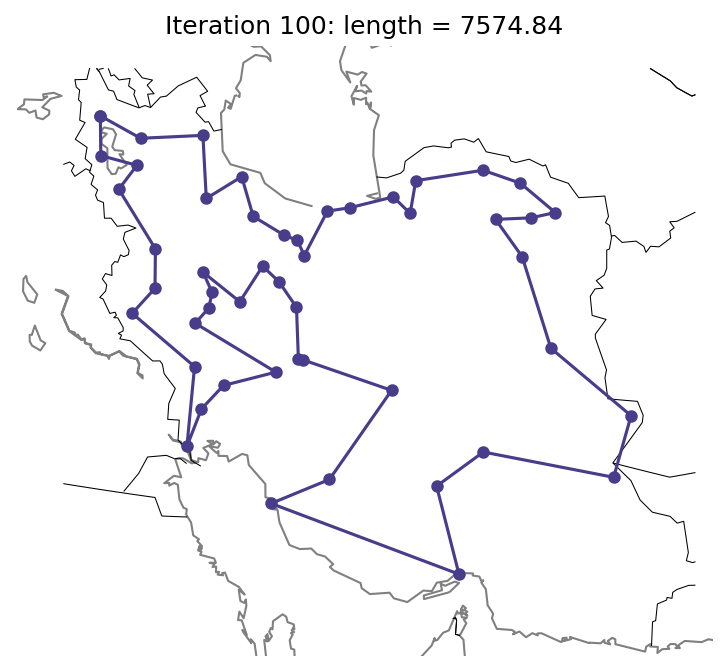

In [16]:
create_animation_plot(best_tours, xlim=(minx, maxx), ylim=(miny, maxy), step=1)

### Nearest Neighbor

In [17]:
def first(collection): 
    return next(iter(collection))

    
def nearest_neighbor(city, cities):
    "Find the nearest city in cities to the input city."
    return min(cities, key=lambda c: city.distance(c))


def nearest_neighbor_tour(cities, start=None):
    # create tour object with the given cities
    tour = Tour(cities)
    
    # put first city in the tour
    start = start or 0
    city = cities[start]
    tour.ids = [start]
    
    # put remaining cities using nearest neighbor heuristic
    unvisited = set(cities) - {city}
    while unvisited:
        city = nearest_neighbor(city, unvisited)
        tour.ids.append(cities.index(city))
        unvisited.remove(city)
        
    return tour

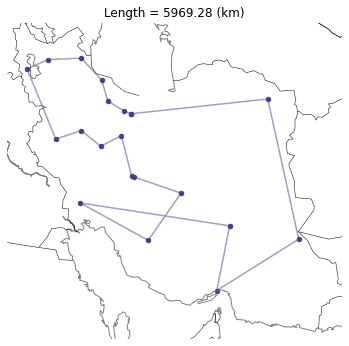

In [18]:
nn_tour = nearest_neighbor_tour(ir[:20], 0)
nn_tour.plot()

### Minimum Spanning Tree

In [19]:
from itertools import combinations


def shortest_edges_first(cities):
    "Return all links between cities, sorted shortest first."
    return sorted(combinations(cities, 2), key=lambda edge: edge[0].distance(edge[1]))


def mst(cities):
    mst_tree = {first(cities): []}
    edges = shortest_edges_first(cities)
    while len(mst_tree) < len(cities):
        (c1, c2) = first((c1, c2) for (c1, c2) in edges if (c1 in mst_tree) ^ (c2 in mst_tree))
        if c1 not in mst_tree:
            c1, c2 = c2, c1
        mst_tree[c1].append(c2)
        mst_tree[c2] = []
    return mst_tree

402 node Graph of total length: 16441.0


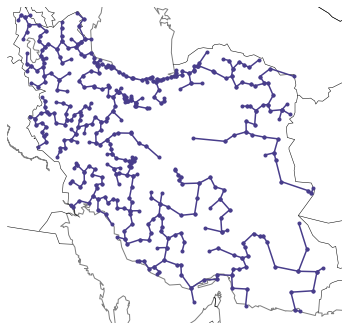

In [23]:
def plot_graph(graph):
    "Given a graph of the form {parent: [child...]}, plot vertexes and links."
    plt.figure(figsize=(6, 6))
    # plot map of iran
    m = Basemap(projection='gnom', resolution='l', 
                lat_0=32.5, lon_0=54,
                width=1.8E6, height=1.7E6)

    m.drawcoastlines(color='gray')
    m.drawcountries(color='black')
    
    V = {v for parent in graph for v in graph[parent]} | set(graph)
    E = [(parent, child) for parent in graph for child in graph[parent]]
    length = sum(p.distance(c) for (p, c) in E)
    print('{} node Graph of total length: {:.1f}'.format(len(V), length))
    
    # draw egges
    for e in E:
        xs = [c.x for c in e]
        ys = [c.y for c in e]
        m.plot(xs, ys, 'b.-', color='darkslateblue', clip_on=False, latlon=True)
        
    plt.axis('off')

    
plot_graph(mst(ir))

In [24]:
def mst_tour(cities):
    "Create a minimum spanning tree and walk it in pre-order, omitting duplicates."
    tour = Tour(cities)
    tour.ids = list(preorder_traversal(cities, mst(cities), first(cities)))
    return tour

def preorder_traversal(cities, tree, root):
    "Traverse tree in pre-order, starting at root of tree."
    yield cities.index(root)
    for child in tree.get(root, ()):
        yield from preorder_traversal(cities, tree, child)

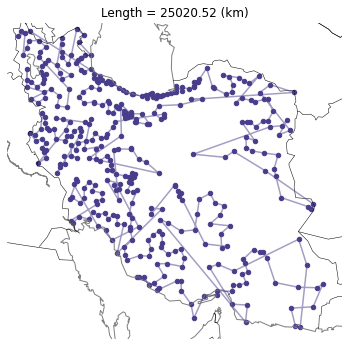

In [25]:
mst_tour(ir).plot()

### Simulated Annealling

In [26]:
def sa(cities, T0=5, alpha=0.995, tol=1e-5):
    # create a random tour of input cities
    current = Tour(cities)
    T = T0

    # SA loop
    while True:
        
        if T < tol: return current
        
        # select a random neighbor of current
        neighbor = current.random_neighbor()
        
        # decide to go from current to neighbor
        delta_E = current.length() - neighbor.length()
        if delta_E > 0:
            current = neighbor
        elif random.random() < math.exp(delta_E / T):
            current = neighbor
        
        # decrease temperature slowly
        T = alpha * T
                
    return current

### Genetic Algorithm

In [31]:
def create_initial_population(cities, p1=0.0, p2=0.5):
    # create random initial population using nearest neighbor heuristic
    population = []
    
    for i in tqdm.tqdm(range(1, pop_size+1), total=pop_size, desc="Initialize:"):
        r = random.random()
        if r < p1:
            T0 = random.choice(range(1, 5)) * 1.0
            alpha = random.choice([0.993, 0.994, 0.995])
            tol = random.choice([1e-4, 1e-5, 1e-6, 1e-7])
            tour = sa(cities, T0=T0, alpha=alpha, tol=tol)
        elif r < p1 + p2:
            start = random.randrange(0, len(cities))
            tour = nearest_neighbor_tour(cities, start)
        else:
            samples = [Tour(cities) for _ in range(50)]
            tour = min(samples, key=lambda tour: tour.length())
        
        population.append(tour)
        
    return population
    

def ga(cities, pop_size=100, max_generations=50, pc=0.9, pm=0.2, k=10):
            
    best_tours, bests, means = [], [], []
    
    # create random initial population using nearest neighbor heuristic
    population = create_initial_population(cities)

    pbar = tqdm.tqdm(range(0, max_generations + 1), 
                         desc='Generation 0', 
                         total=max_generations, 
                         postfix={'best': -1, 'mean': -1})
    
    for generation in pbar:
        
        # gather statistics
        best_tour = min(population, key=lambda tour: tour.length())
        mean = sum([tour.length() for tour in population]) / pop_size
        best_tours.append(best_tour)
        bests.append(best_tour.length())
        means.append(mean)
        
        # update progress bar
        pbar.set_description('Generation {:3d}'.format(generation))
        pbar.set_postfix({'best': "{:.2f}".format(best_tour.length()), 'mean': "{:.2f}".format(mean)})
        
        # create a new population
        new_population = []
        
        for _ in range(pop_size // 2):
            
            # select parents
            parent1 = tournament_selection(population, k)
            parent2 = tournament_selection(population, k)
            
            # crossover
            if random.random() < pc:
                child1, child2 = crossover(parent1, parent2)
            else:
                child1, child2 = parent1, parent2
                
            # mutation
            if random.random() < pm:
                child1 = mutate(child1)
            if random.random() < pm:
                child2 = mutate(child2)
                                
            # add offsprings to the new population
            new_population += [child1, child2]
                
        population = new_population
        
    return best_tour, best_tours, bests, means

Initialize:: 100%|██████████| 200/200 [00:00<00:00, 229.53it/s]
Generation 100: : 101it [00:25,  3.92it/s, best=7525.99, mean=8534.60]                       


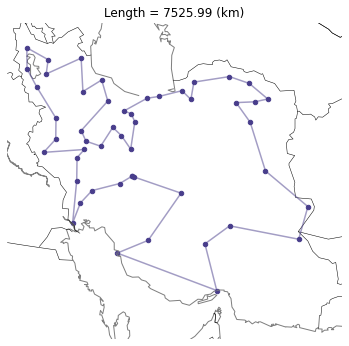

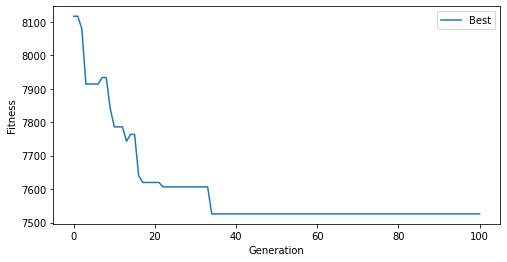

In [32]:
# GA parameters
N = 50  # len(ir)
pop_size = 200
max_generations = 100

p_crossover = 0.9
p_mutation = 0.8
k = int(0.1 * pop_size)

# run GA

best_tour, history, bests, means = ga(
    cities=ir[:N], 
    pop_size=pop_size, 
    max_generations=max_generations,
    pc=p_crossover,
    pm=p_mutation,
    k=k
)

# show results
best_tour.plot()
plot_fitness(bests, None)

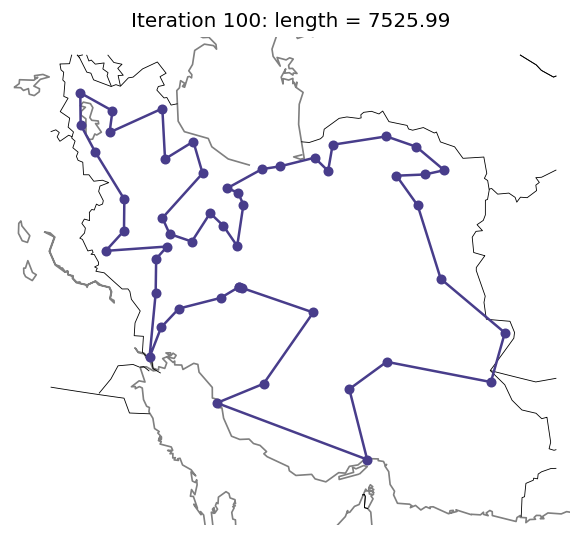

In [33]:
create_animation_plot(history, xlim=(minx, maxx), ylim=(miny, maxy), step=1, dpi=120)